In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/My Drive/DAT565/Data/protein-angle-dataset.csv')
# df = pd.read_csv('protein-angle-dataset.csv')


Mounted at /content/drive/


In [ ]:
print(df.columns)
df.head()

Index(['residue name', 'position', 'chain', 'phi', 'psi'], dtype='object')


,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520


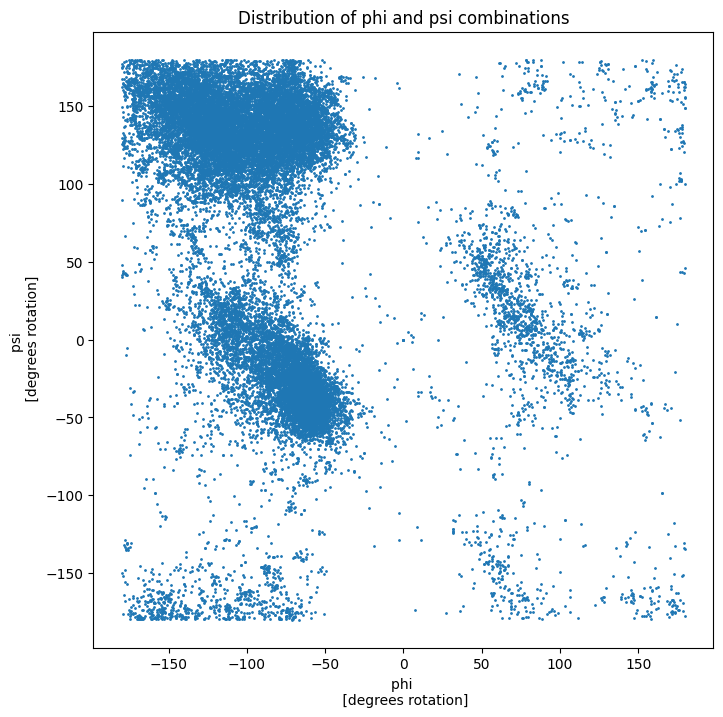

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(df.phi, df.psi, s=1)
plt.xlabel('phi \n [degrees rotation]')
plt.ylabel('psi \n [degrees rotation]')
plt.title('Distribution of phi and psi combinations')
plt.show()

Text(0.5, 0, 'degrees rotation')

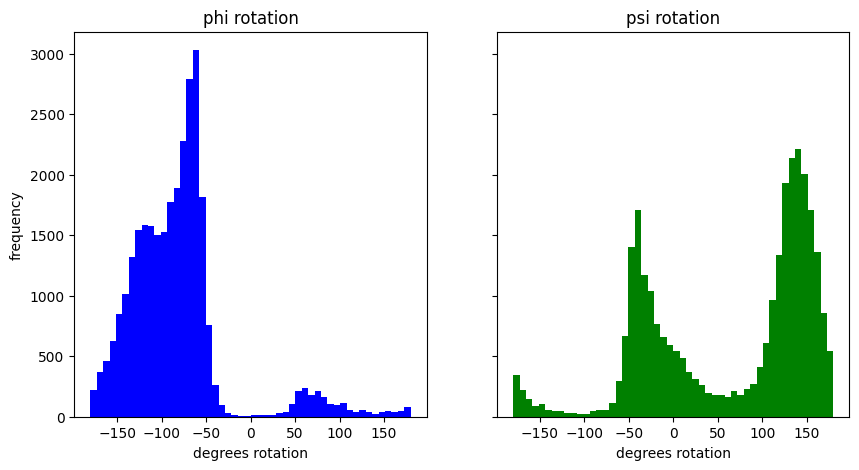

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), sharey=True)
axs[0].hist(df.phi, color='blue', bins=50)
axs[0].set_title('phi rotation')
axs[0].set_xlabel('degrees rotation')
axs[0].set_ylabel('frequency')

axs[1].hist(df.psi, color='green', bins=50)
axs[1].set_title('psi rotation')
axs[1].set_xlabel('degrees rotation')
# plt.show()

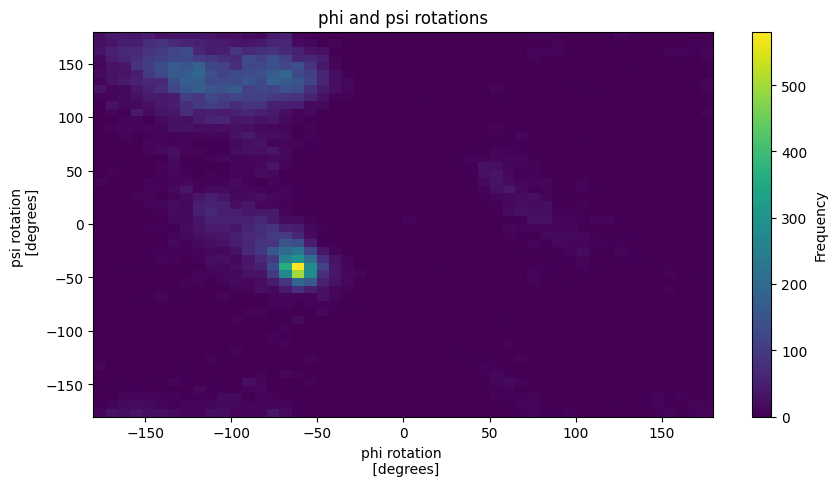

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist2d(df.phi, df.psi, bins=50, cmap='viridis') # 'viridis' is a colormap; you can choose others
plt.colorbar().set_label('Frequency')
plt.xlabel('phi rotation \n [degrees]')
plt.ylabel('psi rotation \n [degrees]')
plt.title('phi and psi rotations')
plt.show()

#K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

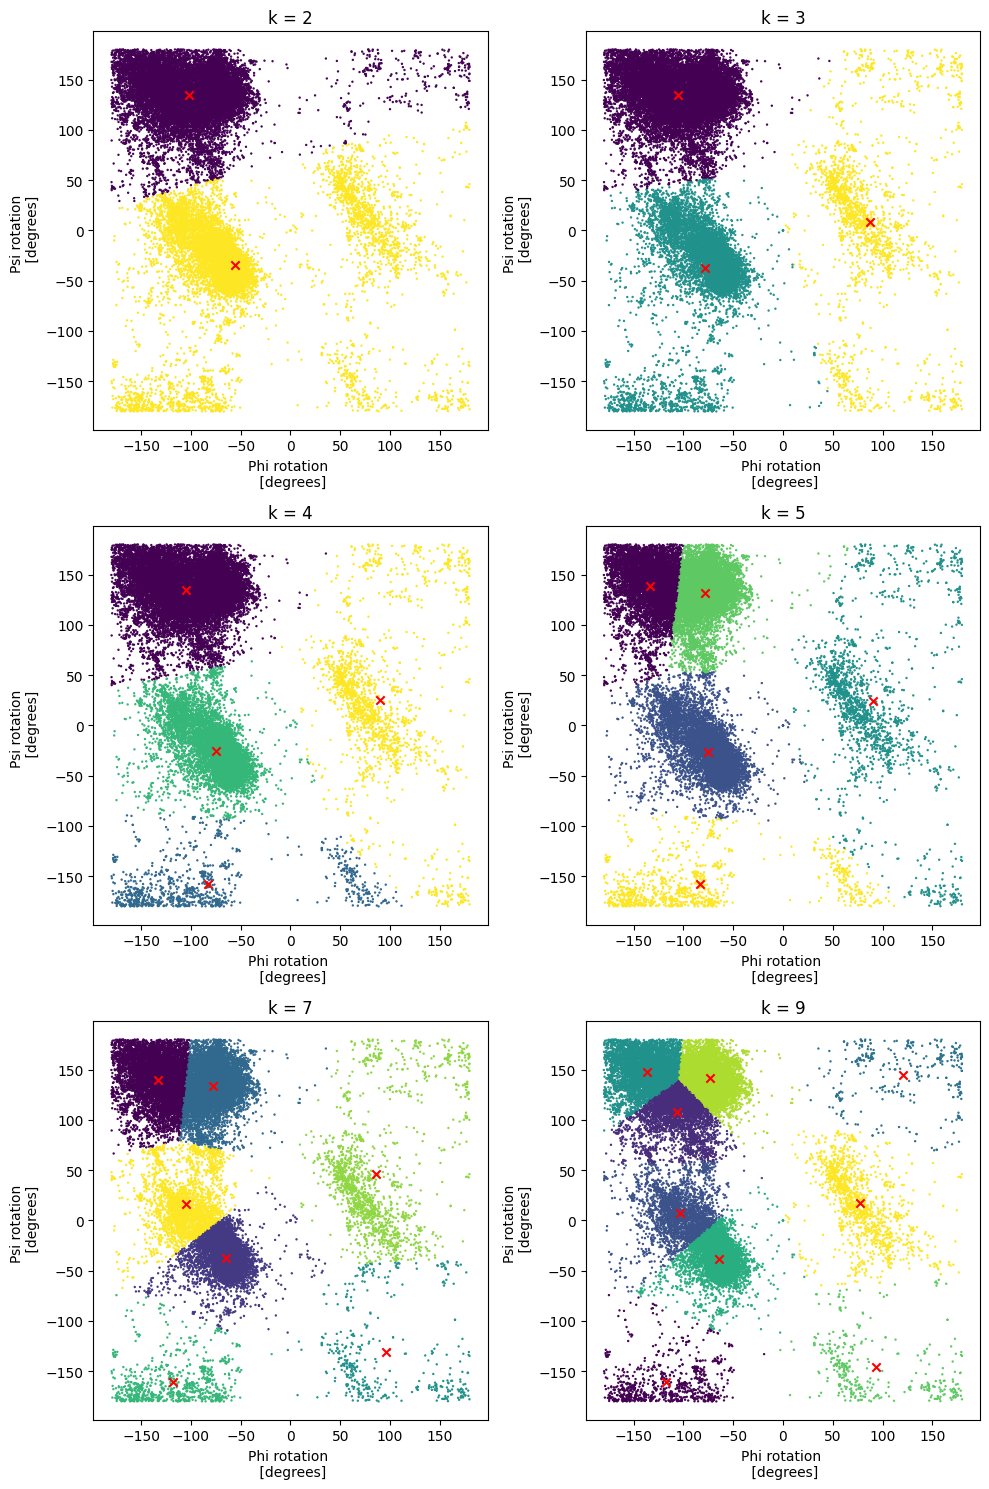

In [ ]:
import matplotlib.gridspec as gridspec

K_range = [2, 3, 4, 5, 7, 9]
inertias = []

# Create a 2x3 grid of subplots
fig = plt.figure(figsize=(10, 15))
gs = gridspec.GridSpec(3, 2)

for i, k in enumerate(K_range):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df[['phi', 'psi']])
    inertias.append(kmeans.inertia_)
    ax = plt.subplot(gs[i])

    ax.scatter(df['phi'], df['psi'], c=kmeans.labels_, cmap='viridis', s=0.5)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

    ax.set_xlabel('Phi rotation \n [degrees]')
    ax.set_ylabel('Psi rotation \n [degrees]')
    ax.set_title(f'k = {k}')

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()


[120313517.05448268, 74759867.24597636, 59268161.719916835, 46432326.29850346, 29215017.5381322, 20830932.61159348]


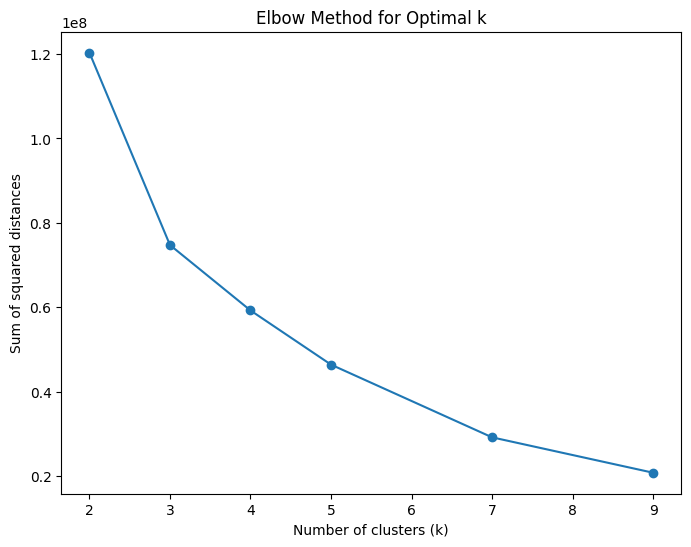

In [ ]:
print(inertias)
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
delta_inertias = [inertias[i+1] - inertias[i] for i in range(len(inertias)-1)]
print(inertias)
print(delta_inertias)
index_of_max_delta = min(enumerate(delta_inertias), key=lambda x: x[1])[0]
print(index_of_max_delta)


[120313517.05448268, 74759867.24597636, 59268161.719916835, 46432326.29850346, 29215017.5381322, 20830932.61159348]
[-45553649.808506325, -15491705.526059523, -12835835.421413377, -17217308.76037126, -8384084.926538717]
0


#DBSCAN

In [ ]:
array = df[['phi', 'psi']].to_numpy()
array.size

58738

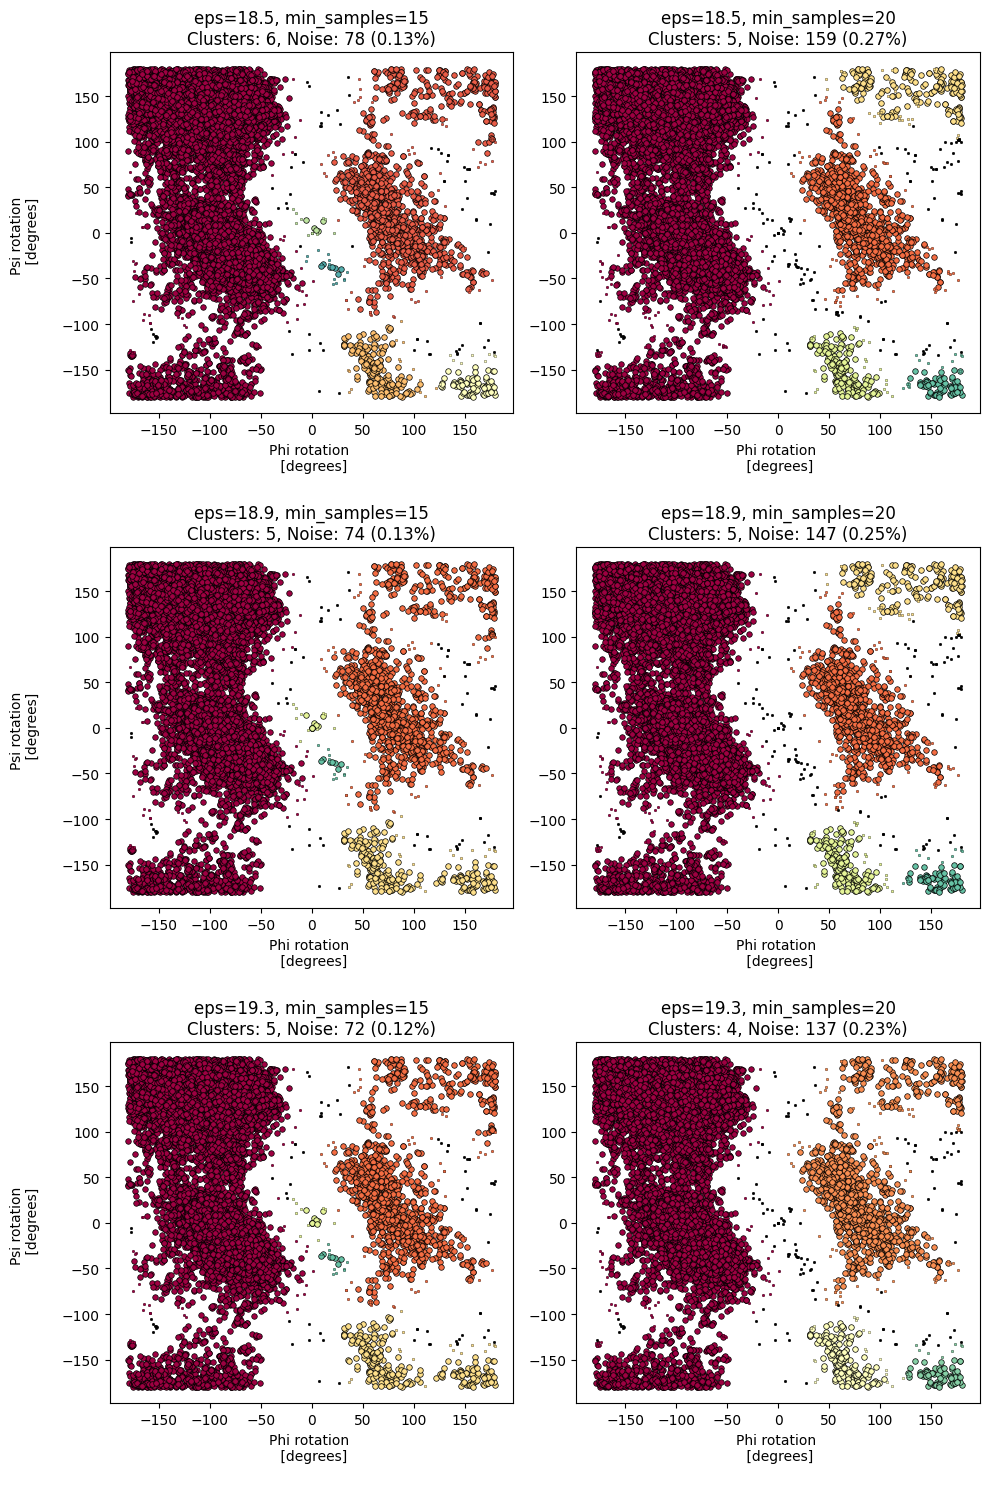

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Define a range of eps and min_samples values
eps_range = [18.5, 18.9, 19.3]
min_samples_range = [15, 20]

# Create a grid of subplots
fig, axs = plt.subplots(len(eps_range), len(min_samples_range), figsize=(10, 15))

# Iterate over eps and min_samples values
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(array)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        dblabels = db.labels_

        # Calculate cluster statistics
        n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
        n_noise_ = list(dblabels).count(-1)

        # Plot result
        unique_labels = set(dblabels)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = (dblabels == k)

            xy = array[class_member_mask & core_samples_mask]
            axs[i, j].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                        markeredgecolor='k', markersize=4, markeredgewidth=0.5)

            xy = array[class_member_mask & ~core_samples_mask]
            axs[i, j].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                        markeredgecolor='k', markersize=2, markeredgewidth=0.2)

        # Add title with chosen eps and min_samples
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters_}, Noise: {n_noise_} ({n_noise_/array.size*100:.2f}%)')

        # Add x and y labels
        # if i == len(eps_range) - 1:
        axs[i, j].set_xlabel('Phi rotation \n [degrees]\n')
        if j == 0:
            axs[i, j].set_ylabel('Psi rotation \n [degrees]\n')

plt.tight_layout()
plt.show()


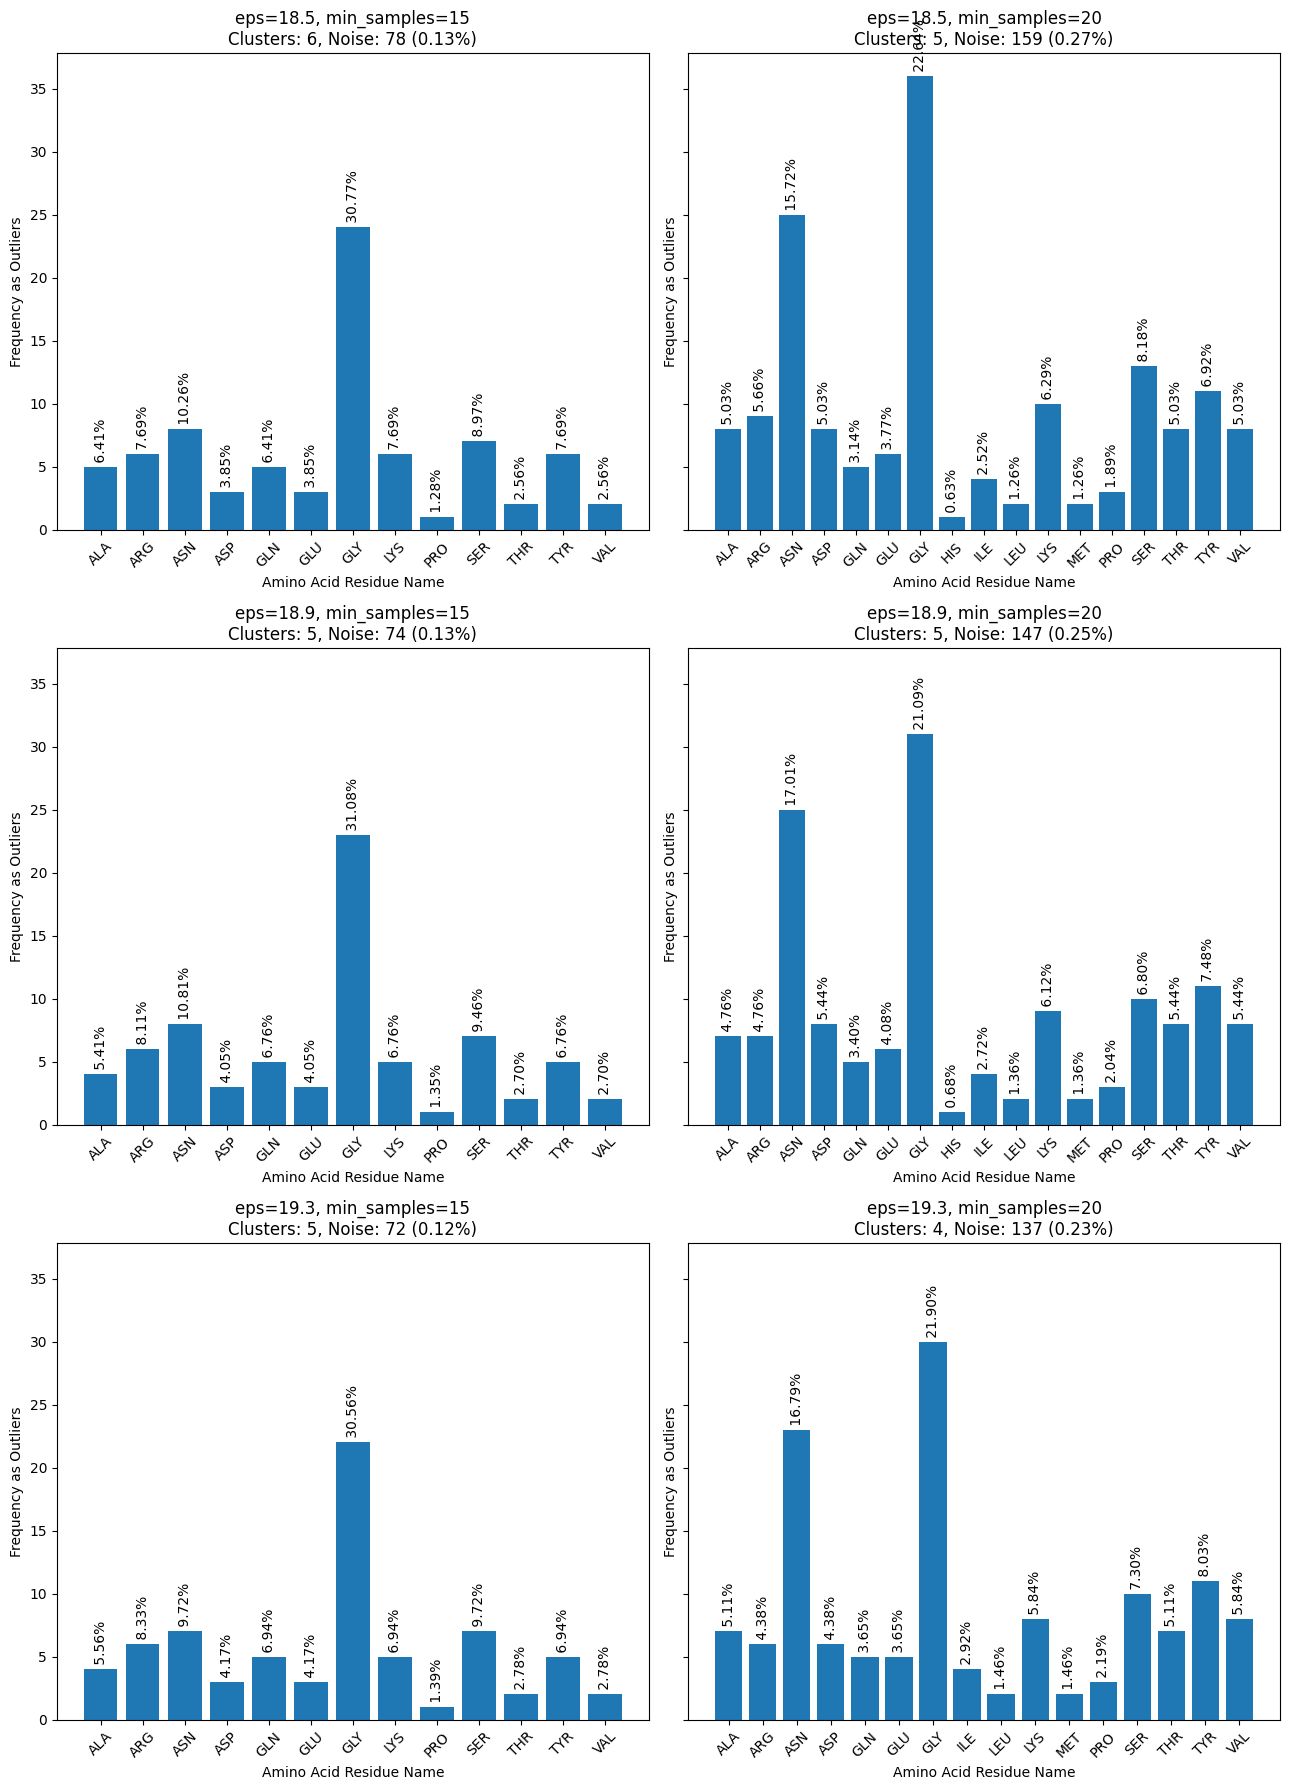

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

# Define a range of eps and min_samples values
eps_range = [18.5, 18.9, 19.3]
min_samples_range = [15, 20]

# Create a grid of subplots
fig, axs = plt.subplots(len(eps_range), len(min_samples_range), figsize=(13, 18), sharey=True)

# Iterate over eps and min_samples values
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(array)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        dblabels = db.labels_

        # Calculate cluster statistics
        n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
        n_noise_ = list(dblabels).count(-1)

        # Get noise points for this combination of eps and min_samples
        noise_points = df[dblabels == -1]

        # Calculate outlier residue counts
        outlier_residue_counts = noise_points['residue name'].value_counts().sort_index()

        # Plot bar chart
        bars =axs[i, j].bar(outlier_residue_counts.index, outlier_residue_counts.values)

        total_height = sum(outlier_residue_counts.values)
        for bar in bars:
            height = bar.get_height()
            percentage = (height / total_height) * 100
            axs[i, j].text(bar.get_x() + bar.get_width() / 2, height, f" {percentage:.2f}%", ha='center', va='bottom', rotation=90)


        axs[i, j].set_xlabel('Amino Acid Residue Name')
        axs[i, j].set_ylabel('Frequency as Outliers')
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters_}, Noise: {n_noise_} ({n_noise_/array.size*100:.2f}%)')
        axs[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


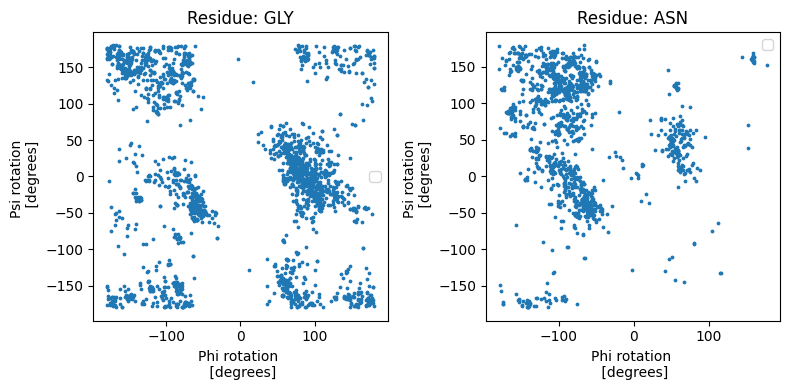

In [ ]:
import matplotlib.pyplot as plt

# List of frequent outliers
freq_outliers = ['GLY', 'ASN']

# Create a subplot layout with 1 row and 3 columns for a horizontal layout
fig, axs = plt.subplots(1, len(freq_outliers), figsize=(8,4))

# For each residue name, plot the scatter plot in a separate subplot
for i, residue in enumerate(freq_outliers):
    # Filter the data for the current residue
    df_residue = df[df['residue name'] == residue]

    # Plot the scatter plot on the corresponding subplot
    axs[i].scatter(df_residue['phi'], df_residue['psi'], s=3)
    axs[i].set_title(f'Residue: {residue}')
    axs[i].set_xlabel('Phi rotation \n [degrees]')
    axs[i].set_ylabel('Psi rotation \n [degrees]')
    axs[i].legend()

plt.tight_layout()
plt.show()

#Only residue name = PRO

In [ ]:
df2 = df.loc[df['residue name'] == 'PRO', ['phi', 'psi']]
array2 = df2[['phi', 'psi']].to_numpy()
array2.size

3192

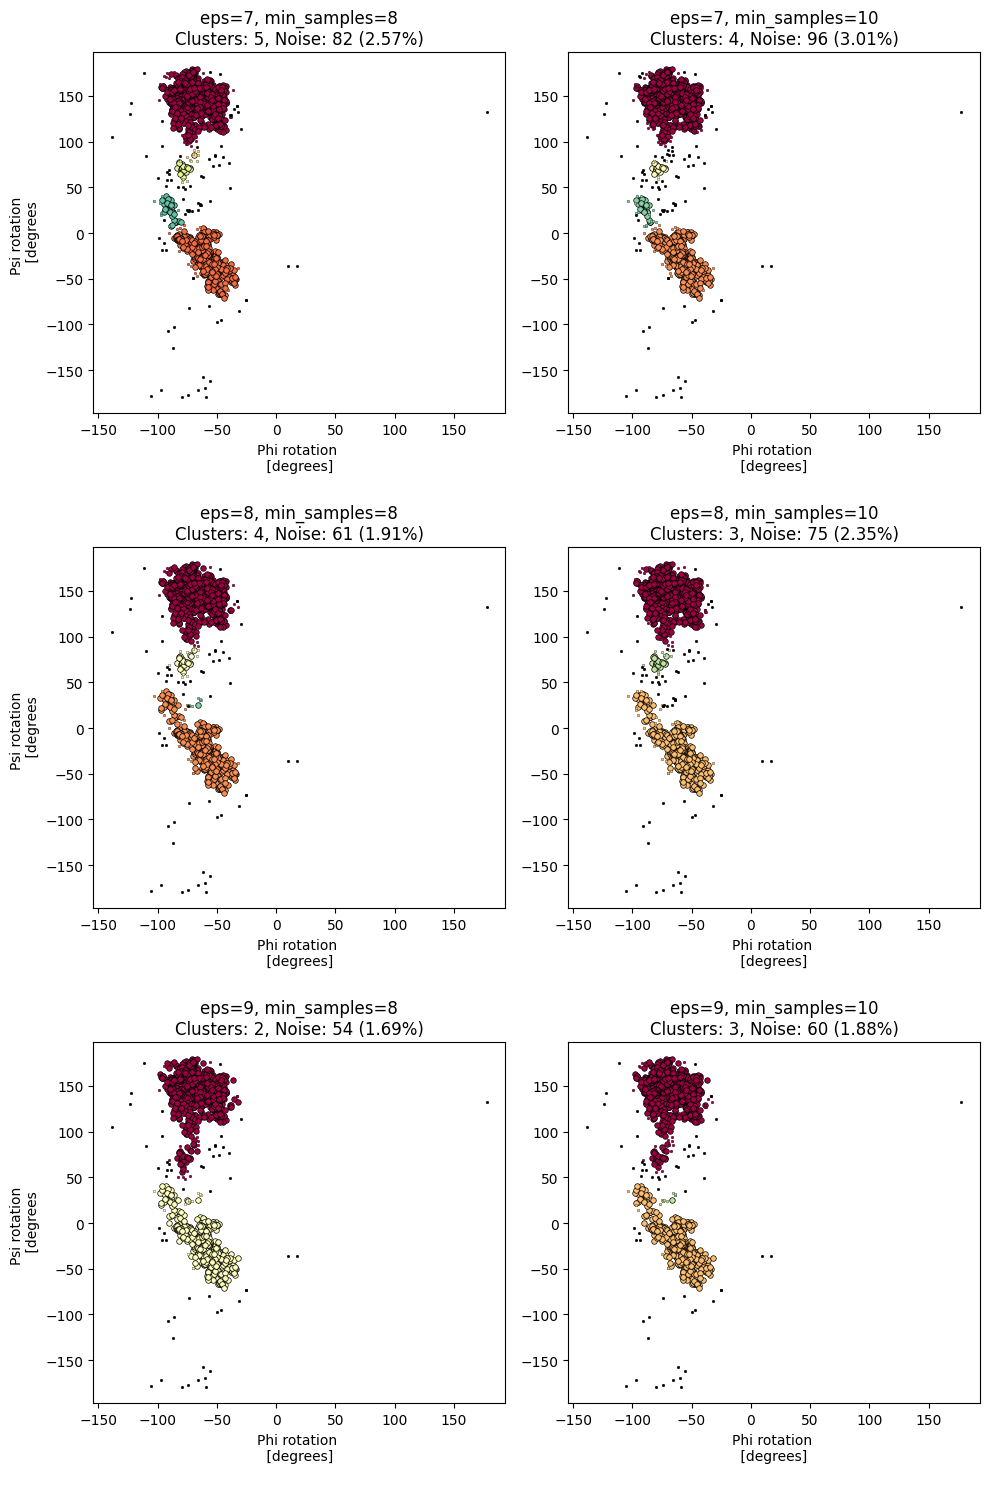

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# Define a range of eps and min_samples values
eps_range = [7, 8, 9]
min_samples_range = [8, 10]

# Create a grid of subplots
fig, axs = plt.subplots(len(eps_range), len(min_samples_range), figsize=(10, 15))

# Iterate over eps and min_samples values
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_samples_range):
        db2 = DBSCAN(eps=eps, min_samples=min_samples).fit(array2)

        core_samples_mask = np.zeros_like(db2.labels_, dtype=bool)
        core_samples_mask[db2.core_sample_indices_] = True
        dblabels2 = db2.labels_

        # Calculate cluster statistics
        n_clusters_ = len(set(dblabels2)) - (1 if -1 in dblabels2 else 0)
        n_noise_ = list(dblabels2).count(-1)

        # Plot result
        unique_labels = set(dblabels2)
        colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            if k == -1:
                col = [0, 0, 0, 1]

            class_member_mask = (dblabels2 == k)

            xy = array2[class_member_mask & core_samples_mask]
            axs[i, j].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                        markeredgecolor='k', markersize=4, markeredgewidth=0.5)

            xy = array2[class_member_mask & ~core_samples_mask]
            axs[i, j].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                        markeredgecolor='k', markersize=2, markeredgewidth=0.2)

        # Add title with chosen eps and min_samples
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters_}, Noise: {n_noise_} ({n_noise_/array2.size*100:.2f}%)' )

        # Add x and y labels
        # if i == len(eps_range) - 1:
        axs[i, j].set_xlabel('Phi rotation \n [degrees] \n')
        if j == 0:
            axs[i, j].set_ylabel('Psi rotation \n [degrees')

plt.tight_layout()
plt.show()
